# Bayesian exploration using script

In [1]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.bayesian.algorithms import bayesian_exploration

# test function
from xopt.evaluators import test_TNK
?bayesian_exploration

Signature:
bayesian_exploration(
    vocs,
    evaluate_f,
    n_steps=1,
    n_initial_samples=1,
    output_path=None,
    custom_model=None,
    executor=None,
    restart_file=None,
    initial_x=None,
    verbose=True,
    generator_options=None,
)
Docstring:
Bayesian Exploration

Parameters
----------
vocs : dict
    Varabiles, objectives, constraints and statics dictionary, see xopt documentation for detials

evaluate_f : callable
    Returns dict of outputs after problem has been evaluated

n_steps : int, default = 1
    Number of optimization steps to execute

n_initial_samples : int, defualt = 1
    Number of initial samples to take before using the model, overwritten by initial_x

output_path : str, default = ''
    Path location to place outputs

custom_model : callable, optional
    Function of the form f(train_inputs, train_outputs) that returns a trained custom model

executor : Executor, optional
    Executor object to run evaluate_f

restart_file : str, optional
    Fi

In [2]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}

# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK


# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=30,                            ## number of optimization step
                               verbose=True)

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x000001B4802749A0>
submitting initial candidates at time 2021-08-27T10:48:20-05:00
starting optimization loop
Model creation time: 0.253 s
Candidate generation time: 0.617 s
Candidate(s): tensor([[0.0000, 0.2313]], dtype=torch.float64)
submitting candidates at time 2021-08-27T10:48:21-05:00
Model creation time: 0.356 s
Candidate generation time: 0.55 s
Candidate(s): tensor([[1.3284, 0.0000]], dtype=torch.float64)
submitting candidates at time 2021-08-27T10:48:22-05:00
Model creation time: 0.277 s
Candidate generation time: 0.58 s
Candidate(s): tensor([[0.8498, 0.8548]], dtype=torch.float64)
submitting candidates at time 2021-08-27T10:48:22-05:00
Model creation time: 0.3 s
Candidate generation time: 0.9 s
Candidate(s): tensor([[0.6024, 1.0694]], dtype=torch.float64)
submitting candidates at time 2021-08-27T10:48:24-05:00
Model creation time: 0.498 s
Candidate genera

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraints', 'corrected_constraints', 'constraint_status', 'feasibility', 'model'])


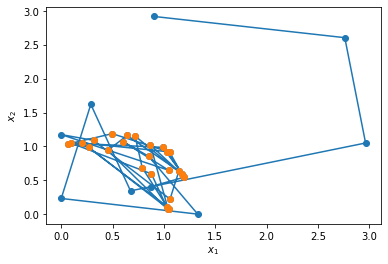

In [3]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()

### Bayesian exploration with proximal biasing
- should result in a smoother path through input space

In [5]:
# Get VOCS
VOCS = test_TNK.VOCS

# technically this is not necessary, but its good to be explict
VOCS['objectives'] = {'y1' : None}
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK

generator_options = {'sigma': torch.eye(2) * 0.5,            ## Specify proximal term (requires batch_size = 1)
                     #'batch_size': 5,                       ## Specify batched exploration
                     # 'custom_model': myCustomModel,        ## Specify custom model creation function
                     # 'use_gpu': False,                         ## Use GPU (if available)
                    }

# Run - see comments for example options
results = bayesian_exploration(VOCS, EVALUATE,
                               generator_options = generator_options,
                               n_initial_samples=5,                   ## Specify number of initial random samples
                               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
                               n_steps=30,                            ## number of optimization step
                               # restart_data_file = 'results.json',  ## restart optimization file
                               verbose=True)

started running optimization with generator: <xopt.bayesian.generators.exploration.BayesianExplorationGenerator object at 0x000001B480548C40>
submitting initial candidates at time 2021-08-27T10:49:51-05:00
starting optimization loop
Model creation time: 0.177 s
Candidate generation time: 0.571 s
Candidate(s): tensor([[0.4616, 1.3544]], dtype=torch.float64)
submitting candidates at time 2021-08-27T10:49:52-05:00
Model creation time: 0.248 s
Candidate generation time: 0.652 s
Candidate(s): tensor([[0.8814, 1.1066]], dtype=torch.float64)
submitting candidates at time 2021-08-27T10:49:53-05:00
Model creation time: 0.328 s
Candidate generation time: 0.567 s
Candidate(s): tensor([[0.5876, 0.7525]], dtype=torch.float64)
submitting candidates at time 2021-08-27T10:49:54-05:00
Model creation time: 0.306 s
Candidate generation time: 0.526 s
Candidate(s): tensor([[0.0080, 0.5485]], dtype=torch.float64)
submitting candidates at time 2021-08-27T10:49:55-05:00
Model creation time: 0.4125 s
Candidate

dict_keys(['variables', 'objectives', 'corrected_objectives', 'constraints', 'corrected_constraints', 'constraint_status', 'feasibility', 'model'])


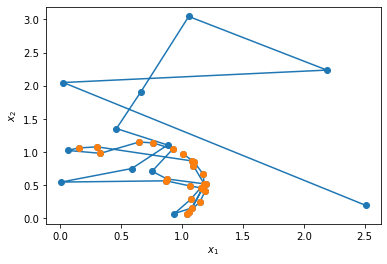

In [6]:
# plot exploration results and path - exploration should explore the feasible region of the TNK problem - See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf
fig, ax = plt.subplots()
print(results.keys())
variables = results['variables']
valid = results['variables'][results['feasibility'].flatten()]
ax.plot(variables[:, 0], variables[:, 1], '-o')
ax.plot(valid[:, 0], valid[:, 1], 'o')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')

plt.show()